In [11]:
import numpy as np
import pandas as pd
import scipy.stats 
import matplotlib.pyplot as plt

In [12]:
#Скачал файл из другого источника, вместо nan были знаки вопроса, поэтому написал небольшой скрипт, который убрал все строки с "пустыми" значениями, не используя pandas. 
#Надеюсь это можно считать за альтернативный способ работы с пропусками ) 
'''
f = open('desktop/adult.csv')
list_ = []
for i in f:
    if '?' not in i:
        list_.append(i)
f.close()

my_file = open('desktop/newAdult.csv', 'w+')
for i in list_:
    my_file.write(i)
my_file.close()
'''
data = pd.read_csv('newAdult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


<BarContainer object of 6 artists>

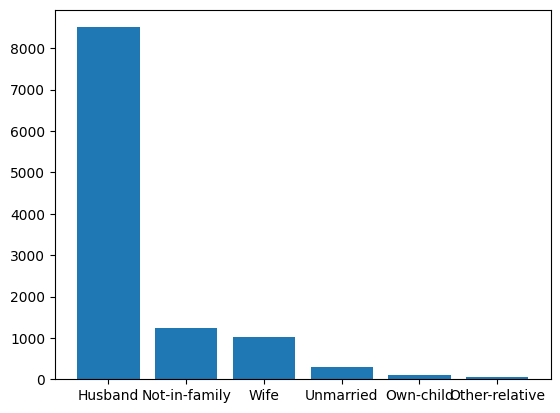

In [14]:
#Данный график приводит график часот для людей, годовой доход которых превышает 50000 долларов
incMore = data['income'].isin(['>50K'])
dfMore = data[incMore]
eduMore = dfMore['relationship'].value_counts()
plt.bar(x = eduMore.index, height = eduMore.values)

<BarContainer object of 6 artists>

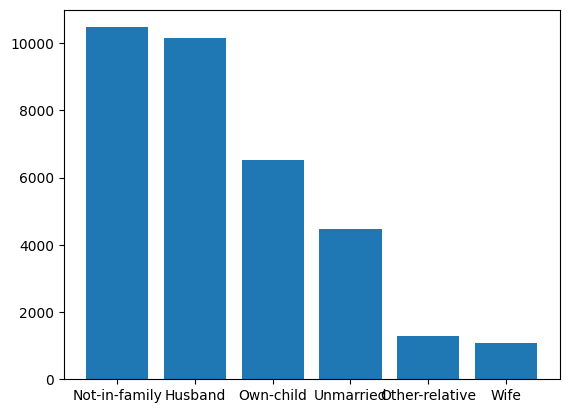

In [15]:
#Данный график приводит график часот для людей, годовой доход которых меньше 50000 долларов
incLess = data['income'].isin(['<=50K'])
dfLess = data[incLess]
eduLess = dfLess['relationship'].value_counts()
plt.bar(x = eduLess.index, height = eduLess.values)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
X = data[['age', 'workclass', 'education', 'educational-num', 'relationship','occupation', 'marital-status', 'hours-per-week', 'gender', 'income']]
X = pd.get_dummies (X, drop_first=True)
del X['income_>50K']
X.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,gender_Male
0,25,7,40,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,38,9,50,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,28,12,40,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,44,10,40,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,34,6,30,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
le.fit(data['income'])
le.transform(['<=50K'])

array([0])

In [11]:
y = pd.Series(data = le.transform(data['income']))

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [15]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
model.score(X_train, y_train) 

0.8309146695414213

In [17]:
model.score(X_test, y_test) 

0.8318407960199005

In [18]:
model.predict_proba(X_test)[0]

array([0.99603399, 0.00396601])

In [19]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 


In [20]:
clf.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [21]:
clf.score(X_train, y_train) 

0.8356690715095226

In [22]:
clf.score(X_test, y_test) 

0.8352681039248203

**Сравнение результатов логитической регрессии**
При проведении обучения модели получились следующие результаты: при работе с данными для обучения модель показала точность ~ 83,1 %, а при работе с тестовыми данными модель показала точность 83,2 %, что на 0,1 % выше точности обучения. В данном случае точность предсказания тестовых данных была выше чем, точность обучения.

**Сравнение результатов метода опорных векторов**
При проведении обучения модели получились следующие результаты: при работе с данными для обучения модель показала точность ~ 83,57 %, а при работе с тестовыми данными модель показала точность 83,53 %, что на 0,04 % ниже точности обучения. В данном случае точность предсказания тестовых данных была чуть ниже, чем точность обучения.

1. Был исправлен датасет (удалены пропуски).
2. Были отобраны признаки, которые, по-моему мнению, больше всего влияют на суммарный доход. Отбор был осуществлен на основе построенных графиков.
3. После чего была произведена пререкодировка категориальных признаков.
4. Разбиение данных на **обучающие** и **тестовые**
5. Обучение модели логистической регрессии и получение результатов
6. Обучение модели с помощью метода опорных векторов и получение результатов

При сравнении результатов предсказания уровеня дохода с помощью логистической регрессии и метода опорных векторов, второй показал более высокую точность.

С моей точки зрения модели показали достаточно наплохие результаты, однако если бы данная модель использовалась для получения каких-либо более важных данных, то такой результат мог бы привести к достаточно серьезным убыткам. Думаю, что для повышения качества можно провести более точный анализ данных и выбрать более важные признаки из перечня, а также использовать специальные алгоритмы которые повышает точность модели.